In [1]:
import maintsim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# serial line no maintenance
line = maintsim.SimulationParameters(
    process_times = [4, 2, 5, 3, 2],
    buffer_sizes = [2]*5,
    #planned_failures = [(0, 50, 5)],#, (1, 30, 15), (2, 60, 10)],
    
    sim_time = 250, warmup_time=0)

scenario1 = maintsim.Scenario(line)

scenario1.simulate()


               processing time units produced        TH MTTF MTTR  \
Machine 0                    4             54  0.216867  NaN  NaN   
Machine 1                    2             51  0.204819  NaN  NaN   
Machine 2                    5             48  0.192771  NaN  NaN   
Machine 3                    3             47  0.188755  NaN  NaN   
Machine 4                    2             47  0.188755  NaN  NaN   
System     bottleneck time = 5             47     0.188  NaN  NaN   

          availability  avg queue time  
Machine 0            1             NaN  
Machine 1            1             NaN  
Machine 2            1             NaN  
Machine 3            1             NaN  
Machine 4            1             NaN  
System               1             NaN  

 Bottleneck machine idle for 6 time units.


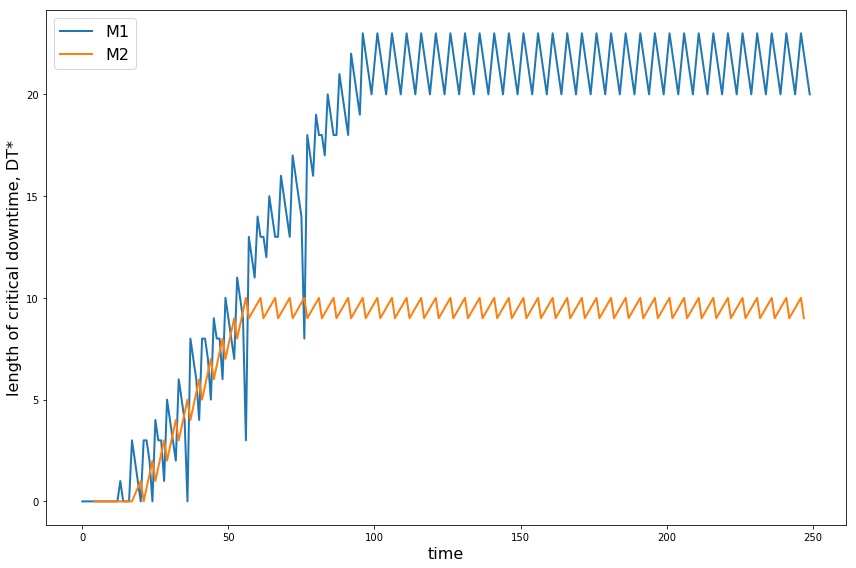

In [15]:
plt.figure(figsize=(12,8))
plt.plot(scenario1.machines[0].DT_crit_window, label='M1', lw=2)
plt.plot(scenario1.machines[1].DT_crit_window, label='M2', lw=2)
plt.xlabel('time', fontsize=16)
plt.ylabel('length of critical downtime, DT*', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('C:/Users/Michael/Desktop/Temp/DT_crit_warmup1.eps', format='eps')
plt.tight_layout()
plt.show()

In [78]:
# serial line no maintenance
line = maintsim.SimulationParameters(
    process_times = [4, 2, 5, 3, 2],
    buffer_sizes = [2]*5,
    planned_failures = [(4, 150, 100)],#, (2, 60, 10)],
    
    sim_time = 500, warmup_time=0)

scenario2 = maintsim.Scenario(line)

scenario2.simulate()


               processing time units produced        TH MTTF MTTR  \
Machine 0                    4             89  0.178357  NaN  NaN   
Machine 1                    2             86  0.172345  NaN  NaN   
Machine 2                    5             83  0.166333  NaN  NaN   
Machine 3                    3             83  0.166333  NaN  NaN   
Machine 4                    2             81  0.162325  150  100   
System     bottleneck time = 5             81     0.162  150  100   

          availability  avg queue time  
Machine 0            1             NaN  
Machine 1            1             NaN  
Machine 2            1             NaN  
Machine 3            1             NaN  
Machine 4        0.798             0.0  
System          0.9596             0.0  

 Bottleneck machine idle for 80 time units.


In [67]:
scenario2.production_data.to_csv('scenario2_validation.csv')

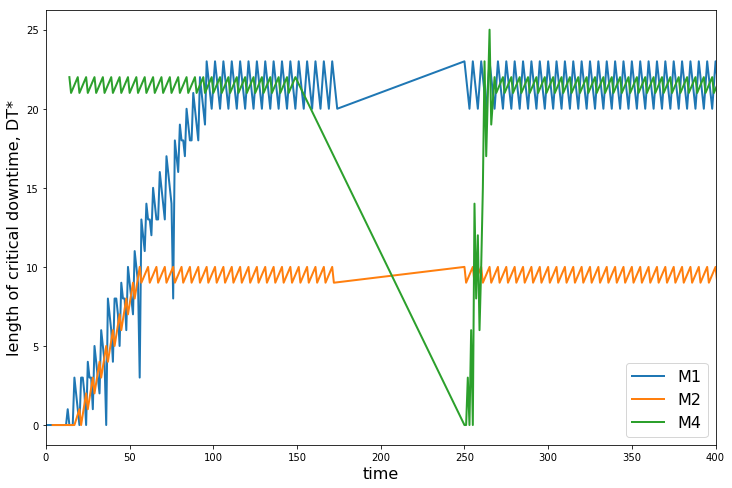

In [79]:
plt.figure(figsize=(12,8))
plt.plot(scenario2.machines[0].DT_crit_window, label='M1', lw=2)
plt.plot(scenario2.machines[1].DT_crit_window, label='M2', lw=2)
#plt.plot(scenario2.machines[2].DT_crit_window)
#plt.plot(scenario2.machines[3].DT_crit_window)
plt.plot(scenario2.machines[4].DT_crit_window, label='M4', lw=2)
plt.xlabel('time', fontsize=16)
plt.ylabel('length of critical downtime, DT*', fontsize=16)
plt.xlim([0,400])
plt.legend(fontsize=16)
#plt.savefig('C:/Users/Michael/Desktop/Temp/DT_crit_warmup3.eps', format='eps')
plt.show()

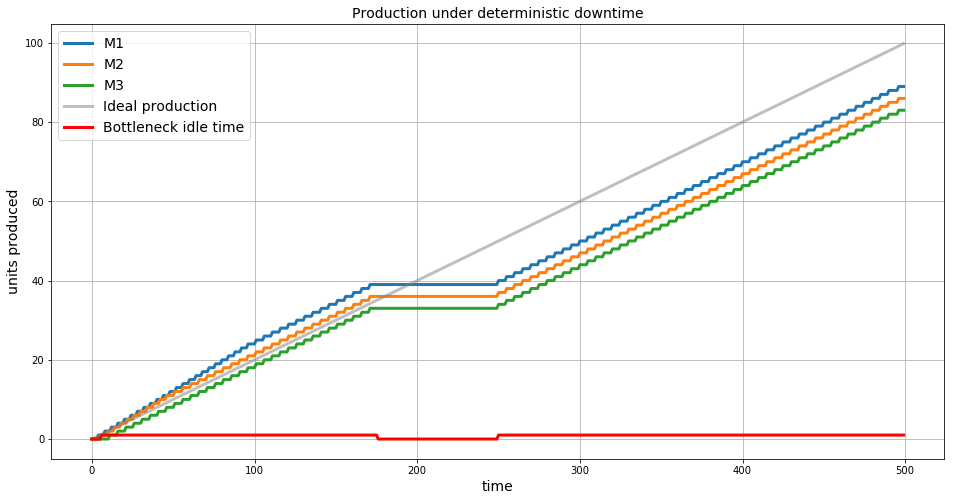

In [80]:
machines = [0,1,2]
plt.figure(figsize=(16,8))
for i in machines:
    plt.plot(scenario2.production_data.loc[0:,'Machine {} production'.format(i)],
        label='M{}'.format(i+1), lw=3)
plt.plot(scenario2.production_data.loc[0:,'Ideal production'], c='grey', lw=3, alpha=0.5)
plt.plot(scenario2.production_data.loc[0:,'M2 processing'], label='Bottleneck idle time', lw=3, c='red')
#plt.xticks(np.arange(0,101,10), np.arange(0, 101, 10))
plt.xlabel('time', fontsize=14)
plt.ylabel('units produced', fontsize=14)
plt.legend(fontsize=14)
plt.title('Production under deterministic downtime', fontsize=14)
plt.grid()
#plt.xlim([0,100])
#plt.ylim([0,25])
#plt.savefig('C:/Users/Michael/Desktop/Temp/case1_production.eps', format='eps')
plt.show()

In [57]:
import scipy.stats as ss
# weibull reliability plot
x = np.linspace(0,10,1000)
cdf = 1 -ss.weibull_min.cdf(x, 3, 3)

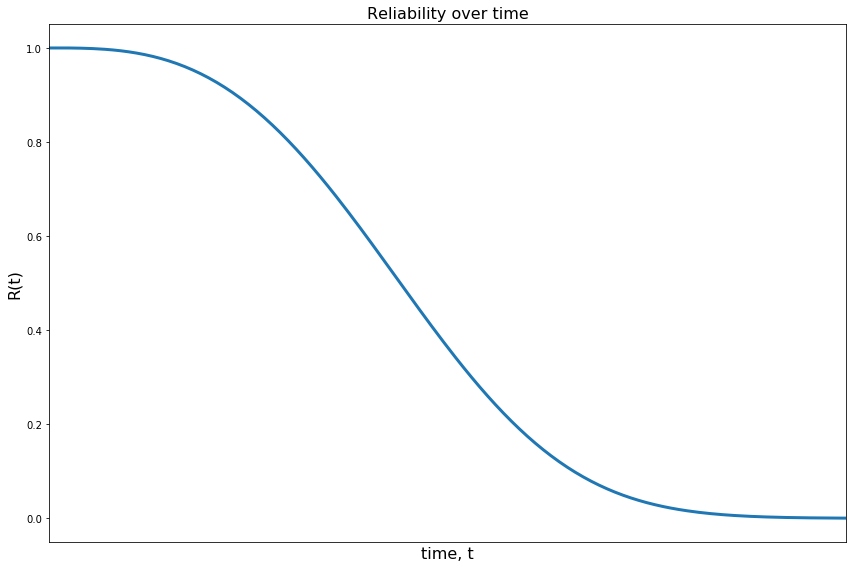

In [70]:
plt.figure(figsize=(12,8))
plt.plot(cdf, lw=3)
plt.xlim([300,500])
plt.xticks([])
plt.xlabel('time, t', fontsize=16)
plt.ylabel('R(t)', fontsize=16)
plt.title('Reliability over time', fontsize=16)
plt.tight_layout()
plt.savefig('C:/Users/Michael/Desktop/Temp/reliability.png', format='png')
plt.show()